In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read an image using OpenCV and convert it to grayscale 
image = cv2.imread(r'E:\flower.jpg', cv2.IMREAD_GRAYSCALE)

# convert the image into a 1D array
_1D_img = image.flatten()  

# Perform RLE encoding
def Run_length_Encoding(img):
    encoded_data = []
    current_pixel = img[0]
    count = 1

    for i in range(1, len(img)):
        if img[i] == current_pixel:
            count += 1
        else:
            encoded_data.extend([current_pixel, count])
            current_pixel = img[i]
            count = 1

    # Add the last pixel 
    encoded_data.extend([current_pixel, count])

    return encoded_data

# Function to calculate compression ratio
def compression_ratio(_1D_img, encoded_image):
    original_size = len(_1D_img)
    encoded_size = len(encoded_image)
    ratio = (encoded_size / original_size) * 100
    return ratio

# Run-length encode the image
encoded_image = Run_length_Encoding(_1D_img)

# Measure compression effectiveness
compression_ratio = compression_ratio(_1D_img, encoded_image)

# Extract the some of columns from the image to ensure that the methoud is correct
selected_cols_original = _1D_img[0:100]
selected_cols_encoded  = encoded_image[0:100]
# Print the extracted columns from the original image
print("Selected Columns from Original Image:")
print(selected_cols_original)

# Print the extracted columns from the encoded image 
print("Selected Columns from Encoded Image:")
print(selected_cols_encoded)
print("Compression Ratio: {:.2f}%".format(compression_ratio))


Selected Columns from Original Image:
[179 181 183 185 185 184 183 182 182 182 181 181 181 181 182 182 182 175
 171 175 182 184 179 173 175 174 173 175 179 181 181 179 175 175 177 182
 183 180 179 181 173 177 180 180 178 177 179 182 180 181 181 180 181 183
 186 189 181 180 180 178 177 175 173 172 177 177 179 183 185 185 184 182
 181 182 183 182 181 179 179 179 178 181 183 183 179 175 174 174 174 178
 178 176 176 178 176 173 176 176 177 177]
Selected Columns from Encoded Image:
[179, 1, 181, 1, 183, 1, 185, 2, 184, 1, 183, 1, 182, 3, 181, 4, 182, 3, 175, 1, 171, 1, 175, 1, 182, 1, 184, 1, 179, 1, 173, 1, 175, 1, 174, 1, 173, 1, 175, 1, 179, 1, 181, 2, 179, 1, 175, 2, 177, 1, 182, 1, 183, 1, 180, 1, 179, 1, 181, 1, 173, 1, 177, 1, 180, 2, 178, 1, 177, 1, 179, 1, 182, 1, 180, 1, 181, 2, 180, 1, 181, 1, 183, 1, 186, 1, 189, 1, 181, 1, 180, 2, 178, 1, 177, 1, 175, 1, 173, 1]
Compression Ratio: 153.61%


size of original Image: 1500000
size of encoded Image: 2304102


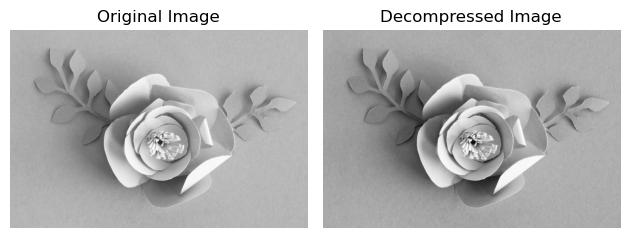

In [12]:
# Run-Length Decoding (RLE decompression)
def Run_length_Decoding(encoded_data):
    decoded_data = []
    i = 0

    while i < len(encoded_data):
        pixel_value = encoded_data[i]
        count = encoded_data[i + 1]

        # Add pixel_value 'count' number of times to the decoded_data list
        decoded_data.extend([pixel_value] * count)

        # Move to the next pair of pixel value and count in the encoded data
        i += 2

    return decoded_data

# Perform Run-Length Decoding (Decompression)
decoded_image_data = Run_length_Decoding(encoded_image)

# Convert the 1D decoded data back to a 2D image shape
height, width = image.shape 
decoded_image = np.array(decoded_image_data).reshape((height, width))


#to know the size of original and compressed images
original_size = len(_1D_img)
encoded_size = len(encoded_image)
print("size of original Image:",original_size)
print("size of encoded Image:",encoded_size)

# Display the original and decompressed images
# Original Image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Decompressed Image
plt.subplot(1, 2, 2)
plt.imshow(decoded_image, cmap='gray')
plt.title('Decompressed Image')
plt.axis('off')

plt.tight_layout()
plt.show()